**Home work 6**

In this exercise we will perform cross-validation on a simulated data set.  (5 pts)      

In [6]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm 
%matplotlib inline


(a) Follow the below steps and generate $y$ from $x$ and $\epsilon$.

* Using the random.normal() function, create a vector,  𝑥 , containing 100 observations drawn from a N(0, 1) distribution. 

* Using the random.normal() function, create a vector, $\epsilon$, containing 100 observations drawn from a N(0, 1) distribution i.e. a normal distribution with mean zero and variance 1.

* Using $x$ and $\epsilon$, generate a vector $y$ according to the model

$Y = x - 2x^2+ \epsilon$ 

In [7]:

np.random.seed(42)


x = np.random.normal(0, 1, 100)


epsilon = np.random.normal(0, 1, 100)

#Generate vector y using the given model
y = x - 2 * x**2 + epsilon

(b) Plot the scatter plot between $x$ and $y$.

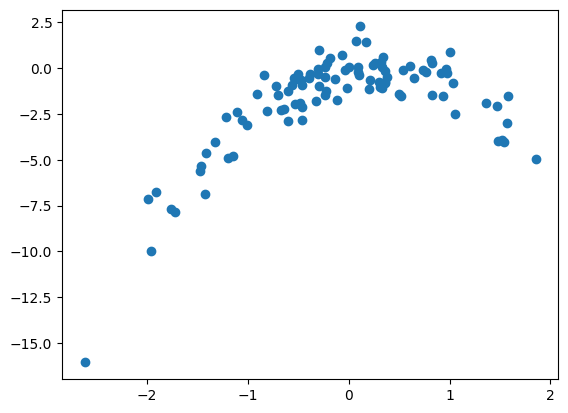

In [8]:
plt.scatter(x,y)
plt.show()

(c) Compute the Leave One Out Cross-Validation errors using Mean squared error (MSE) that result from fitting the following four models using least squares:

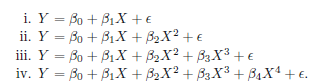

In [9]:
from sklearn.model_selection import cross_val_score

for power in range(1,5):
    poly = PolynomialFeatures(power,include_bias=False)
    X_poly = poly.fit_transform(x.reshape(-1, 1))


    cv = LeaveOneOut()

    model = LinearRegression(fit_intercept=True)
    model.fit(X_poly,y)

    scores = cross_val_score(model, X_poly, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    average_MSE = np.mean(np.absolute(scores))
    print('degree = {}, errors using MSE: {}'.format(power,average_MSE))

degree = 1, errors using MSE: 5.3029566276895945
degree = 2, errors using MSE: 0.9127641950599262
degree = 3, errors using MSE: 0.9569572977749516
degree = 4, errors using MSE: 0.9727724672791439


(d)  What is the model with the smallest LOOCV error


The lowest LOOCV error is attained with the model of the second degree

(e) Observe the statistical significance of the coefficient estimates that results from fitting each of the models above using
least squares.

In [14]:
from sklearn.preprocessing import PolynomialFeatures


for power in range(1, 5):
    # Create polynomial features
    poly = PolynomialFeatures(power, include_bias=False)
    X_poly = poly.fit_transform(x.reshape(-1, 1))
    
    # Add a constant (intercept) term to the model
    X_poly = sm.add_constant(X_poly)
    
    # Fit the linear regression model using statsmodels
    model = sm.OLS(y, X_poly).fit()
    
    # Print the summary statistics for the model
    print(f"Polynomial Degree {power} Model:")
    print(model.summary())

Polynomial Degree 1 Model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     41.83
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           3.91e-09
Time:                        17:57:45   Log-Likelihood:                -220.62
No. Observations:                 100   AIC:                             445.2
Df Residuals:                      98   BIC:                             450.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5712    

(f) Observe the t-statistic values



Model 1:
- Constant (Intercept): -7.032
- x1: 6.468

Model 2:
- Constant (Intercept): -1.199
- x1: 8.582
- x2: -21.423

Model 3:
- Constant (Intercept): -1.258
- x1: 4.653
- x2: -17.534
- x3: 0.397

Model 4:
- Constant (Intercept): -1.598
- x1: 4.485
- x2: -7.745
- x3: -0.588
- x4: -1.150





T 